In [1]:
import sys
import time

import pandas as pd
import numpy as np
from itertools import combinations
from feature_combinations import feature_combinations, feature_matrix, weight_matrix
from prepare_data_causal import prepare_data_causal
from shap import Explanation
import sys
import torch
import math
import random
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import math
import xgboost
from explainer import Explainer
import shap
import time
import itertools


In [20]:
import sys
import time

import pandas as pd
import numpy as np
from itertools import combinations
from feature_combinations import feature_combinations, feature_matrix, weight_matrix
from prepare_data_causal import prepare_data_causal
from shap import Explanation
import sys
import torch
import math
import random
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import math
import xgboost
from explainer import Explainer
import shap
import time
import itertools

            

In [2]:
x1 =np.random.normal(0, 1, size=(10000, 1)) 
x2 = 0.01 *np.random.normal(0, 1, size=(10000, 1)) + 0.99995*x1
x3 = np.random.normal(0, 1, size=(10000, 1))
x6 = 0.3 * np.random.normal(0, 1, size=(10000, 1))  + 0.57 * x2 + 0.57 *x3
x4 = np.random.normal(0, 1, size=(10000, 1)) 
x5 = 0.57 * np.random.normal(0, 1, size=(10000, 1))  + 0.57 * x6 + 0.57 *x4
arr = np.hstack((x1, x2, x3, x4, x5, x6))
pd_data = pd.DataFrame(arr, columns=["x1", "x2", "x3", "x4", "x5", "x6"])
X = pd_data[["x1", "x2", "x3", "x4", "x5"]]
y = pd_data["x6"]
print(X.head())

         x1        x2        x3        x4        x5
0  0.804599  0.819956 -0.418250 -1.182054 -0.085647
1 -0.648193 -0.659140 -0.738131  0.584587  0.659454
2  0.210822  0.205509 -1.479721 -1.453913 -1.337573
3 -1.240363 -1.220527 -0.291561 -0.400585 -0.152008
4 -0.496598 -0.501735  0.011108  0.789183  0.886024


In [25]:
lr = LinearRegression()
lr.fit(X, y)
w = lr.coef_[0]
print(lr.coef_)

[-0.28708587  0.81071076  0.52983483 -0.07763017  0.1422382 ]


In [5]:
print(f'y is {y[0]}, x1 is {X["x1"][0]}, x2 is {X["x2"][0]}, x3 is {X["x3"][0]}')

y is 0.2662168722510729, x1 is 0.33263261660314675, x2 is 0.33033508372566994, x3 is -0.8332229092005881


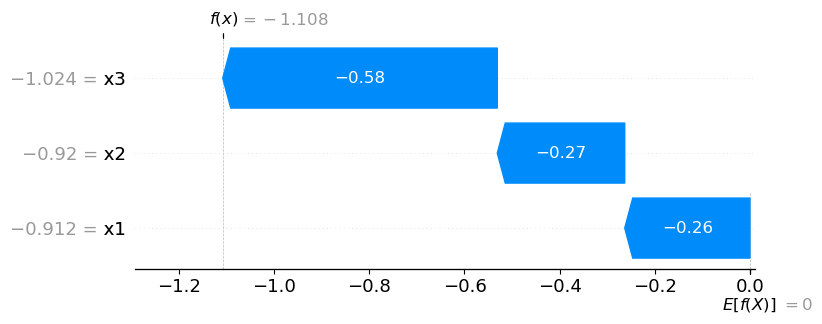

In [10]:
shap.waterfall_plot(a)

In [13]:
sparsest = [('x2', 'x3', 'x1'), ('x3', 'x2', 'x1'), ('x2', 'x1', 'x3')]

a = sh.find_shapley(X.iloc[0], explanation_type="sparset", spasest_oracle=sparsest)
print(f'sparsest shapley is \n{a}')
mb = [('x2', 'x3', 'x1'), ('x3', 'x2', 'x1')]
a = sh.find_shapley(X.iloc[0], explanation_type="markov blanket", markov_blanket_oracle=mb)
print(f'mb shapley is \n{a}')
ancestor = [('x2', 'x3', 'x1'), ('x3', 'x2', 'x1'), ('x2', 'x1', 'x3'), ('x1', 'x2', 'x3'), ('x1', 'x3', 'x2'), ('x3', 'x1', 'x2'),('x2', 'x3', 'x1'), ('x3', 'x2', 'x1')]
a = sh.find_shapley(X.iloc[0], explanation_type="ancestor", ancestor_oracle=ancestor)
print(f'ancestor shapley is \n{a}')

TypeError: frozenset expected at most 1 argument, got 2

In [14]:
oracle = {'x1': {frozenset({'x2'}), frozenset({'x2', 'x3'})}, 
           'x3': set(),
          'x2': set(),
          }

sh = Weighted_Shapley(X, y, lr, 3)
a = sh.find_shapley(X.iloc[0], explanation_type="markov blanket", sparsest_oracle=oracle)
print(f'sparsest shapley is \n{a}')


type of phi_i is <class 'pandas.core.series.Series'>
feture names are ['x1', 'x2', 'x3'] and parentchild is ['x2', 'x3']
['x1']
 permutations are [('x2', 'x3', 'x1'), ('x3', 'x2', 'x1')]
phi is   x1                     x2                      x3
0  0  [0.18838908430745124]   [-0.4652744135427961]
1  0   [0.1805053724009667]  [-0.45739070163631135]
type of phi_i is <class 'pandas.core.series.Series'>
sparsest shapley is 
x1    0.000000
x2    0.184447
x3   -0.461333
dtype: float64


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature na

In [9]:
perms1 = list(itertools.permutations(['x2', 'x3']))
perms2 = list(itertools.permutations([ 'x1', 'x4']))
print(perms1)
from itertools import zip_longest
for item1 in perms1:
    for item2 in perms2:
        print(f'item1 is {item1}, item2 is {item2}')
        print(item1+item2)
print(list(zip_longest(perms1, perms2)))
f =['x1', 'x2', 'x3']
t = ['x2', 'x3']
f - t

[('x2', 'x3'), ('x3', 'x2')]
item1 is ('x2', 'x3'), item2 is ('x1', 'x4')
('x2', 'x3', 'x1', 'x4')
item1 is ('x2', 'x3'), item2 is ('x4', 'x1')
('x2', 'x3', 'x4', 'x1')
item1 is ('x3', 'x2'), item2 is ('x1', 'x4')
('x3', 'x2', 'x1', 'x4')
item1 is ('x3', 'x2'), item2 is ('x4', 'x1')
('x3', 'x2', 'x4', 'x1')
[(('x2', 'x3'), ('x1', 'x4')), (('x3', 'x2'), ('x4', 'x1'))]


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [12]:
b =(a != 0)
b.index[b]

Index(['x2', 'x3'], dtype='object')

In [15]:
oracle[frozenset({'x3', 'x2'})]

{frozenset(), frozenset({'x1'})}

In [18]:
if not oracle[frozenset({'x1', 'x3'})]:
    print("false")

In [61]:
lr = LinearRegression()
subset = ['x1']
lr.fit(X[subset], y)
data_point = X.iloc[0]
expected_value = lr.predict([data_point[subset]])
expected_value

X does not have valid feature names, but LinearRegression was fitted with feature names


array([0.02430999])

In [45]:
X[['x1', 'x2']]

,x1,x2
0,0.077207,0.306002
1,-0.335570,-0.316709
2,0.135244,0.241697
3,0.183566,-0.071457
4,-0.103358,0.195612
...,...,...
9995,0.132775,1.210169
9996,0.350294,-0.273884
9997,-1.600786,-2.057216
9998,-0.284072,-0.438156


In [43]:
X

,x1,x2,x3
0,0.077207,0.306002,-0.330686
1,-0.335570,-0.316709,0.299893
2,0.135244,0.241697,0.019666
3,0.183566,-0.071457,0.280272
4,-0.103358,0.195612,0.083099
...,...,...,...
9995,0.132775,1.210169,-1.443845
9996,0.350294,-0.273884,0.216209
9997,-1.600786,-2.057216,0.780002
9998,-0.284072,-0.438156,-2.120191


In [49]:
k=X.iloc[0]

In [50]:
k[['x1', 'x2']]

x1    0.077207
x2    0.306002
Name: 0, dtype: float64

In [53]:
k

x1    0.077207
x2    0.306002
x3   -0.330686
Name: 0, dtype: float64

In [54]:
y[0]

0.24981988407867492